# Paper Data Prep

Factor data:
- 25 size-value FF portfolios 
- FF Industry portfolios
- the 6 portfolios which form SMB and HML
    - sourced from Ken French's website
- DEF (difference between the return on long-term corporate bonds and long-term government bonds)
- TERM (difference between the return on 30 year government bonds and the short-term rate)
    - both sourced Ibbotson
    - possible sub for corp bond returns (https://fred.stlouisfed.org/series/BAMLCC8A015PYTRIV)
    - CRSP 20 or 30 year bond return, short term as 30 or 90 day
- DEFY (default yield spread: Moody's BAA and AAA yield spread)
    - Amit Goyal or FRED (https://fred.stlouisfed.org/series/BAA & https://fred.stlouisfed.org/series/AAA)
- TERMY (term yield spread: 10 year and 1 year Treasury spread)
    - FRED (https://fred.stlouisfed.org/series/DGS10 & https://fred.stlouisfed.org/series/DGS1)
- RF (30 day T-bill rate)
    - CRSP
- Market portfolio (value-weighted NYSE)
- GDP (seasonally adjusted)
    - FRED (https://fred.stlouisfed.org/series/GDPC1)

Other required data:
- ISM Manufacturing Index
    - sourced from Bloomberg
- FF5 factors + Momentum
    - Ken French
- BBK Monthly GDP
    - FRED (https://fred.stlouisfed.org/series/BBKMGDP)

In [2]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import *
import pandas_datareader.data as pdr

## FRED Data

In [12]:
fred_data = pdr.DataReader(['BAA', 'AAA', 'DGS10' ,'DGS1', 'BAMLCC8A015PYTRIV'],'fred', start='1947-01-01')
fred_data = fred_data.rename(columns={'DGS10':'10 year' ,'DGS1':'1 year', 'BAMLCC8A015PYTRIV':'corp_bond_return'})
fred_data.index = fred_data.index + MonthEnd(0)
fred_data.head()

,BAA,AAA,10 year,1 year,corp_bond_return
DATE,,,,,
1947-01-31,3.13,2.57,NaN,NaN,NaN
1947-02-28,3.12,2.55,NaN,NaN,NaN
1947-03-31,3.15,2.55,NaN,NaN,NaN
1947-04-30,3.16,2.53,NaN,NaN,NaN
1947-05-31,3.17,2.53,NaN,NaN,NaN


#### GDP

In [15]:
gdp_data = pdr.DataReader(['GDPC1'],'fred', start='1947-01-01')
gdp_data.index = gdp_data.index + MonthEnd(0)
gdp_data.head()

,GDPC1
DATE,
1947-01-31,2034.450
1947-04-30,2029.024
1947-07-31,2024.834
1947-10-31,2056.508
1948-01-31,2087.442


### BBK GDP
The Brave-Butters-Kelley Monthly Real GDP Series is a monthly estimate of real GDP using a dynamic factor model of nearly 500 mixed frequency economic indicators. It can be interpreted as an estimate of the GDP growth of a particular month.

In [3]:
gdp_data = pdr.DataReader(['BBKMGDP'],'fred', start='1947-01-01')
gdp_data.index = gdp_data.index + MonthEnd(0)
gdp_data.head()

,BBKMGDP
DATE,
1960-01-31,15.806627
1960-02-29,5.828632
1960-03-31,-4.503055
1960-04-30,-3.776641
1960-05-31,-3.203461


## Ken French Data

In [7]:
from pandas_datareader.famafrench import get_available_datasets
# get_available_datasets()

In [86]:
def get_ff_data():
    series = ['F-F_Research_Data_5_Factors_2x3', '25_Portfolios_5x5', 
                          'F-F_Momentum_Factor', '30_Industry_Portfolios']
    
    dataframes = [pdr.DataReader(data,'famafrench', start='1925-01-01')[0] for data in series]
    
    df = pd.concat(dataframes, axis=1).sort_values(by='Date')
    df.index = df.index.to_timestamp() + MonthEnd(0)
    
    return df

In [87]:
ff_data = get_ff_data()

In [122]:
ff_data.tail()

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-30,-9.35,-0.97,0.06,-1.51,-0.84,0.19,-13.1838,-9.2149,-7.2748,-11.4204,...,-13.94,-11.07,-11.54,-13.27,-14.24,-9.46,-7.67,-6.26,-7.73,-6.40
2022-10-31,7.83,1.86,8.05,3.07,6.52,0.23,3.2654,5.1384,8.7991,9.0880,...,10.94,1.99,8.97,10.02,6.68,13.65,1.94,10.26,12.80,11.25
2022-11-30,4.60,-2.67,1.38,6.01,3.11,0.29,-5.6998,-3.0675,0.6161,0.9805,...,2.32,5.66,4.93,6.96,10.32,5.05,2.95,5.65,4.75,6.54
2022-12-31,-6.41,-0.16,1.32,0.09,4.19,0.33,-6.4639,-4.6920,-5.2707,-4.8792,...,-6.76,-6.68,-9.07,-4.09,-7.66,-5.63,-8.97,-6.82,-5.49,-3.06
2023-01-31,6.65,4.43,-4.08,-2.61,-4.52,0.35,16.8009,14.5972,13.9285,9.3206,...,13.45,9.76,9.81,3.27,8.55,6.89,10.92,10.48,6.46,1.74


## CRSP Data

In [94]:
crsp_data = pd.read_csv("crsp_data.csv", index_col='MthCalDt', parse_dates=True)
crsp_data = crsp_data.pivot(columns="IndNm", values='COL1')
crsp_data.index = crsp_data.index + MonthEnd(0)

In [123]:
crsp_data.tail()

IndNm,CRSP 20-Year Bond Returns,CRSP 30-Day Bill Returns,CRSP 30-Year Bond Returns,CRSP 90-Day Bill Returns
MthCalDt,,,,
2022-08-31,-0.046849,0.001901,-0.053490,0.001806
2022-09-30,-0.067945,0.001929,-0.085155,0.001684
2022-10-31,-0.041092,0.002327,-0.065624,0.001859
2022-11-30,0.071208,0.002856,0.077931,0.003114
2022-12-31,-0.025772,0.003379,-0.035953,0.003280


## ISM

In [154]:
# ISM Quarterly
ism_data = pd.read_excel("ism_data.xlsx")
ism_data = ism_data.set_index('Date', drop=True).sort_values(by='Date')
ism_data.columns = ["ISM"]

In [155]:
ism_data.head()

,ISM
Date,
1948-03-31,43.3
1948-06-30,53.0
1948-09-30,42.1
1948-12-31,35.0
1949-03-31,34.5


In [4]:
# ISM Monthly
ism_monthly = pd.read_excel("ism_monthly.xlsx", index_col=0)
ism_monthly = ism_monthly.sort_values(by='Date')
ism_monthly.head()

,ISM
Date,
1948-01-31,51.7
1948-02-29,50.2
1948-03-31,43.3
1948-04-30,45.4
1948-05-31,49.5


## Merging

In [ ]:
# GDP
gdp = gdp_data.copy()
gdp.index = gdp.index.shift(2, freq='M')
gdp = gdp.shift(1).dropna()

# ISM
ism = ism_data.shift(1).dropna().copy()

In [ ]:
# Lagged (ie. known at time t)
df = pd.merge(gdp, ism, left_index=True, right_index=True)

In [166]:
df['gdp_qoq'] = np.log(df['GDPC1'] / df['GDPC1'].shift(1))
df['gdp_yoy'] = np.log(df['GDPC1'] / df['GDPC1'].shift(4))
df = df.drop('GDPC1', axis=1)

In [169]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

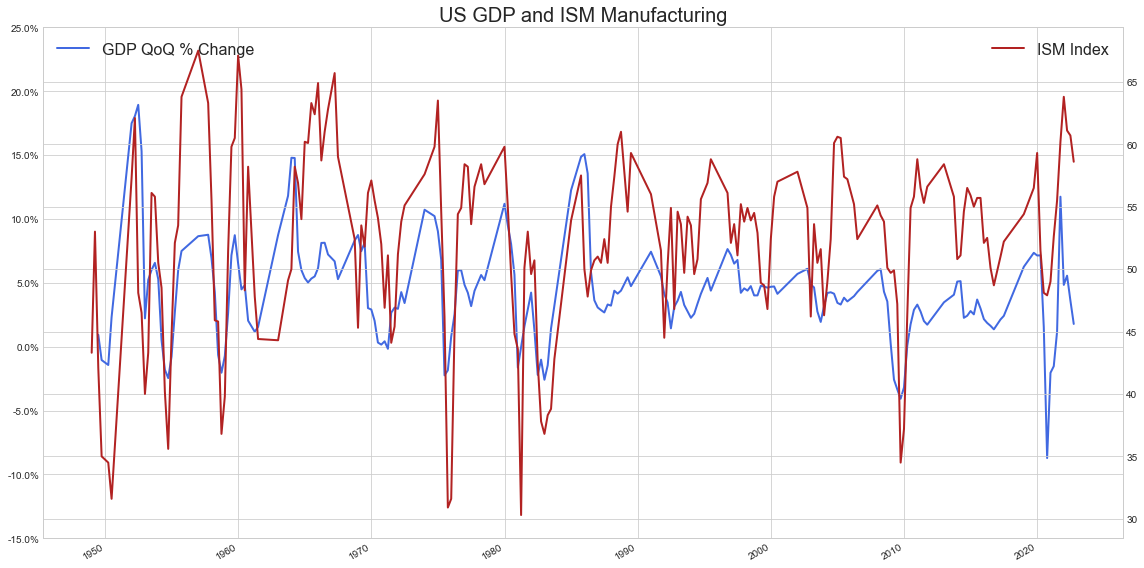

In [183]:
fig, ax = plt.subplots(figsize=(16,8))


ax1 = df["gdp_yoy"].plot(ax=ax, legend=True, label="GDP QoQ % Change", color='royalblue', linewidth=2)
ax11 = ax1.twinx()
ax11 = df["ISM"].shift(2).plot(ax=ax11, legend=True, label="ISM Index", color='firebrick', linewidth=2)
ax1.set_title('US GDP and ISM Manufacturing', fontsize=20)
ax1.legend(loc=2, fontsize=16)
ax11.legend(loc=0, fontsize=16)
ax1.set_xlabel("")
ax1.set_yticks(ax1.get_yticks())
y_labels = ax1.get_yticks()
ax1.set_yticklabels([f'{x:0.1%}' for x in y_labels])


fig.tight_layout()
plt.show()